Лабораторна робота 10

Попередній перегляд

Image shape: (409, 500, 3)


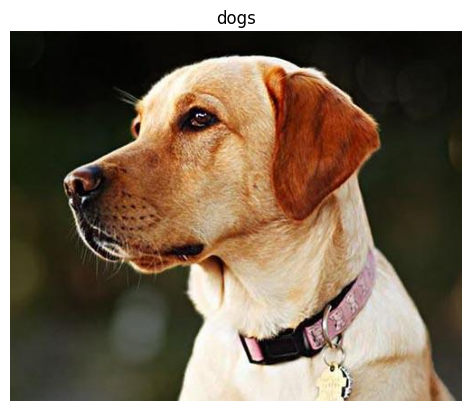

In [28]:
import matplotlib.image as mpimg
import random, os

source_dir = r'C:\Users\Lenovo Legion 5\Downloads\cat_dog'
classes = ['dogs', 'cats']

def view_random_image(target_dir, target_class):
  
  target_folder = target_dir+target_class

 
  random_image = random.sample(os.listdir(target_folder), 1)

  
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 

view_random_image(f'{source_dir}/train/', classes[0])

Побудова моделі на основі MobileNetV2

In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)

tf.random.set_seed(42)

train_data = ImageDataGenerator(rescale=1./255)
valid_data = ImageDataGenerator(rescale=1./255)

train_dir = source_dir+"/train/"
test_dir = source_dir+"/test/"

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


C:\Users\Lenovo Legion 5\PycharmProjects\lab10 AID\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5803 - loss: 0.6859 - val_accuracy: 0.8643 - val_loss: 0.3710
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9264 - loss: 0.2492 - val_accuracy: 0.9071 - val_loss: 0.2542
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9444 - loss: 0.1655 - val_accuracy: 0.8929 - val_loss: 0.2320
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9808 - loss: 0.1171 - val_accuracy: 0.9286 - val_loss: 0.1927
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9840 - loss: 0.1015 - val_accuracy: 0.9286 - val_loss: 0.1926
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9886 - loss: 0.0753 - val_accuracy: 0.9357 - val_loss: 0.1744
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9872 - loss: 0.0795 - val_accuracy: 0.9357 - val_loss: 0.1652
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9927 - loss: 0.0692 - val_accuracy: 0.9357 - val_loss:

Донавчання моделі

In [30]:
model_ft = model

layers_num = len(model_ft.layers)
freeze_limit = layers_num - layers_num*0.15
for i in range(layers_num):
  if i > freeze_limit:
    model_ft.layers[i].Freeze=False

model_ft.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
history_ft = model_ft.fit(
    train_generator,
    epochs=10,  
    validation_data=valid_generator,
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9959 - loss: 0.0479 - val_accuracy: 0.9286 - val_loss: 0.1584
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9998 - loss: 0.0494 - val_accuracy: 0.9286 - val_loss: 0.1579
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9995 - loss: 0.0554 - val_accuracy: 0.9286 - val_loss: 0.1572
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9992 - loss: 0.0489 - val_accuracy: 0.9286 - val_loss: 0.1569
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9934 - loss: 0.0588 - val_accuracy: 0.9286 - val_loss: 0.1568
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9972 - loss: 0.0448 - val_accuracy: 0.9286 - val_loss: 0.1566
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9983 - loss: 0.0478 - val_accuracy: 0.9286 - val_loss: 0.1560
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9988 - loss: 0.0495 - val_accuracy: 0.9286 - val_loss:

Аналіз та візуалізація

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 0.9376 - loss: 0.1320
Test Loss: 0.15514825284481049
Test Accuracy: 0.9285714030265808


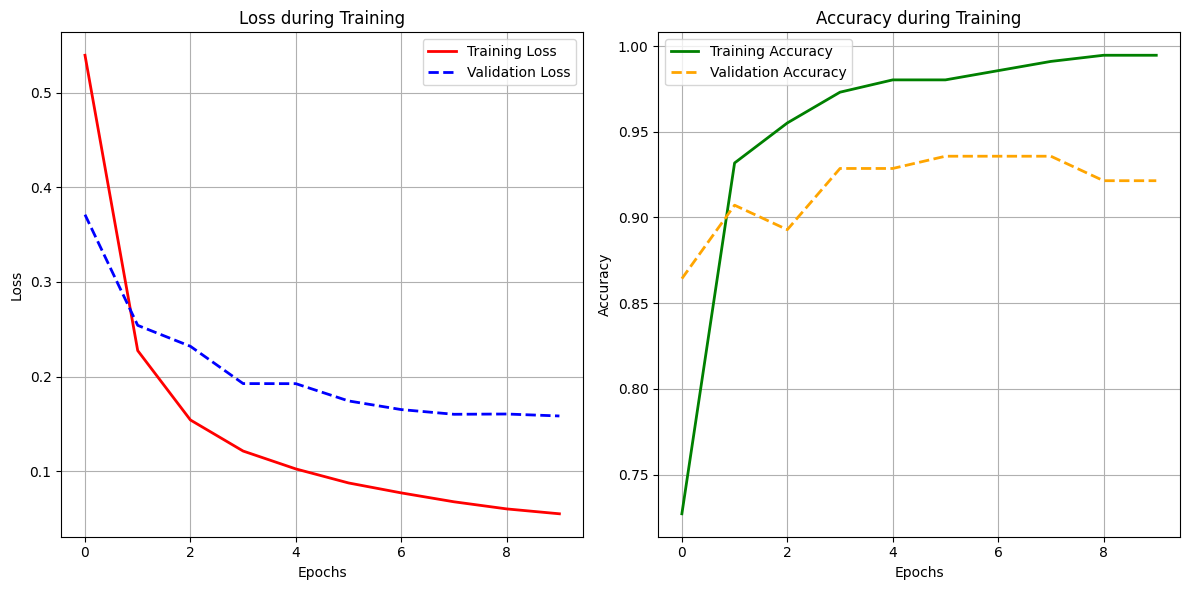

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 950ms/step


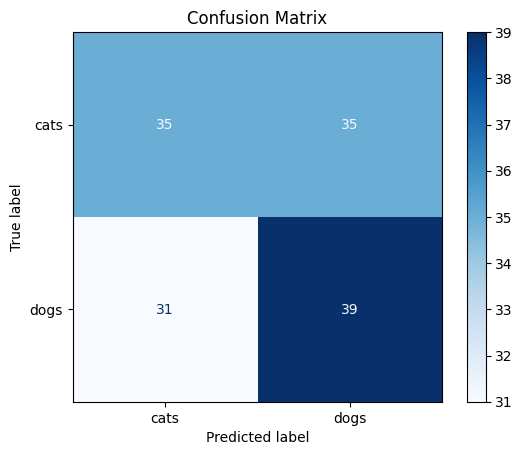

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 737ms/step - accuracy: 0.9297 - loss: 0.1631
Test Loss: 0.15514825284481049
Test Accuracy: 0.9285714030265808


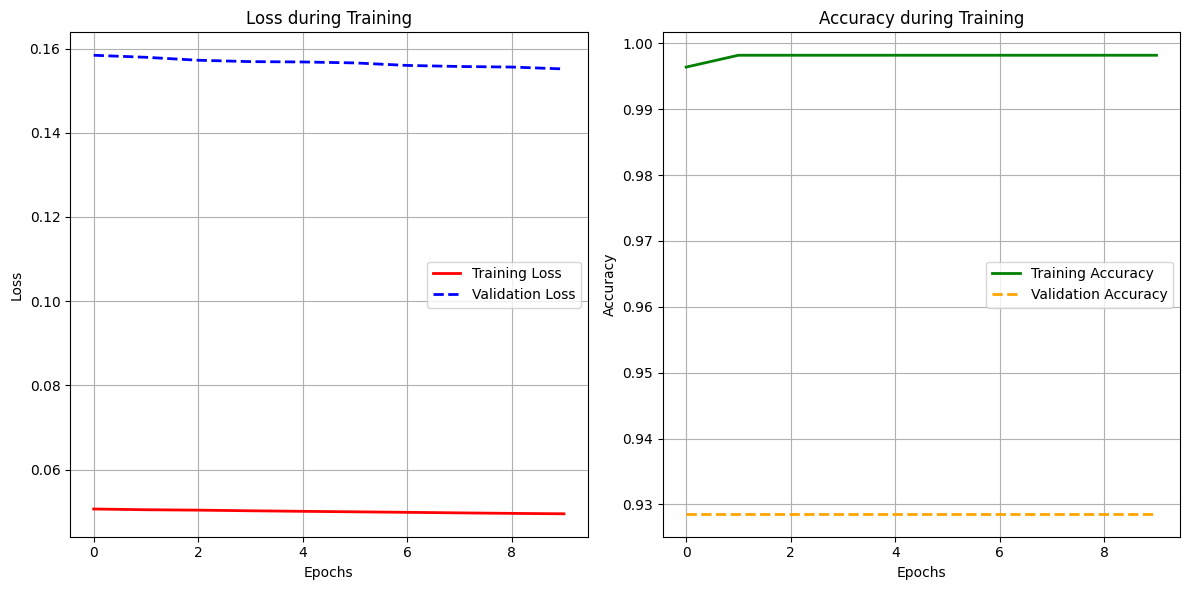

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 743ms/step


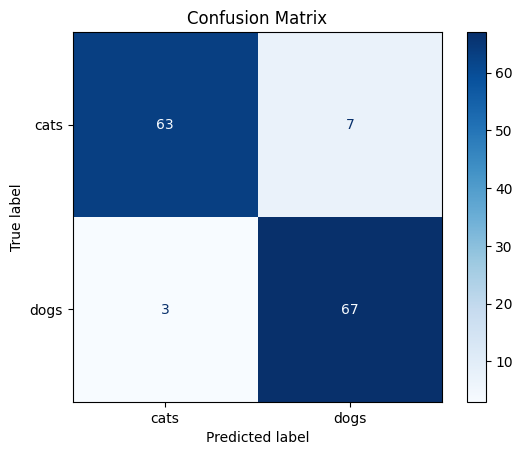

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


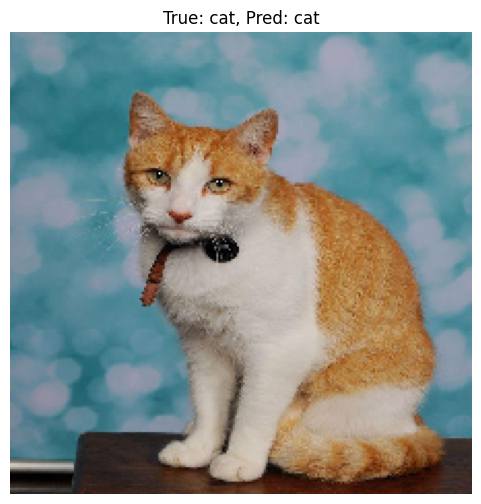

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


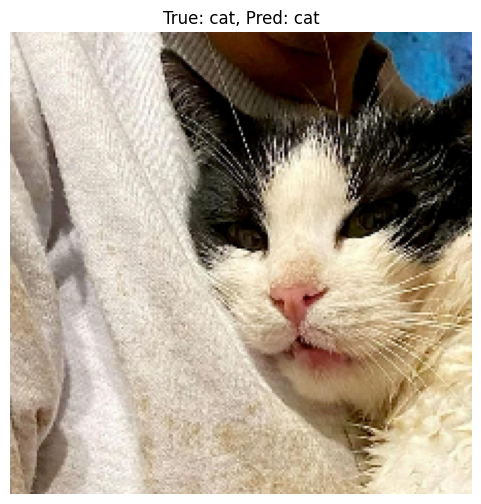

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


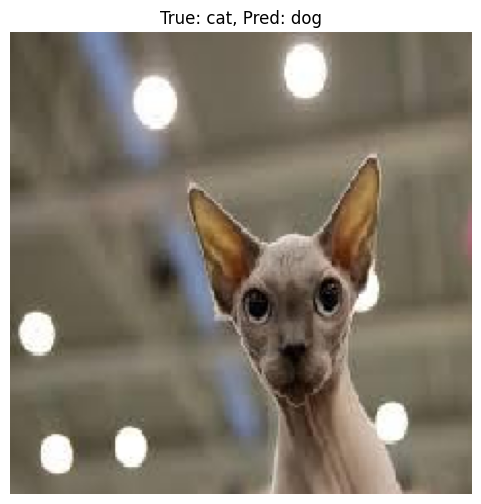

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


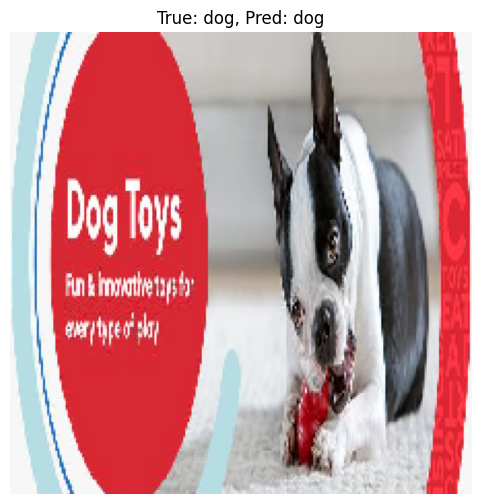

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


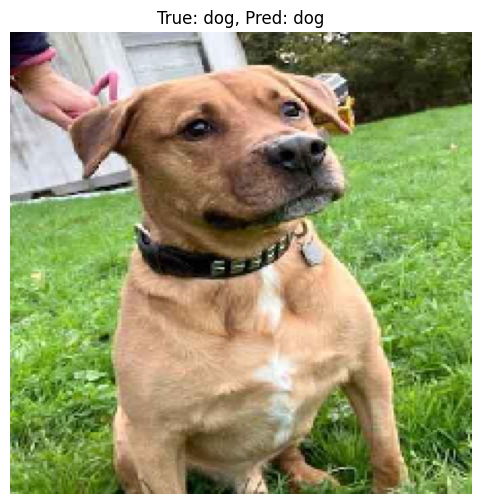

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_metrics(history_: tf.keras.callbacks.History, model: tf.keras.Model, valid_generator: tf.keras.preprocessing.image.DirectoryIterator) -> None:
    # Оцінка моделі
    loss, accuracy = model.evaluate(valid_generator)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")

    # Витягуємо втрати та точність для графіків
    loss = history_.history['loss']
    val_loss = history_.history['val_loss']
    accuracy = history_.history['accuracy']
    val_accuracy = history_.history['val_accuracy']

    epochs = range(len(loss))

    # Візуалізація для Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color='red', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', color='blue', linestyle='--', linewidth=2)
    plt.title('Loss during Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Візуалізація для Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy', color='green', linewidth=2)
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
    plt.title('Accuracy during Training')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Генерація прогнозів і матриця похибок
    valid_generator.shuffle = False  # Важливо, щоб порядок не змінювався
    predictions = model.predict(valid_generator, verbose=1)
    predicted_classes = np.array([1 if x >= 0.5 else 0 for x in predictions])
    true_classes = valid_generator.classes
    class_labels = list(valid_generator.class_indices.keys())

    cm = confusion_matrix(true_classes, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Оцінка та візуалізація для початкової моделі
plot_metrics(history, model, valid_generator)

# Оцінка та візуалізація для fine-tuned моделі
plot_metrics(history_ft, model_ft, valid_generator)

# Візуалізація результатів: показуємо зображення з передбаченнями
def visualize_predictions(generator, model, num_images=5):
    # Вибір випадкових зображень із генератора
    for i in range(num_images):
        img, label = next(generator)  # Використовуємо next(generator) для отримання наступного батчу
        pred = model.predict(np.expand_dims(img[0], axis=0))  # Прогноз для першого зображення в батчі
        pred_label = "dog" if np.round(pred[0]) == 1 else "cat"
        
        plt.figure(figsize=(6, 6))
        plt.imshow(img[0])
        plt.title(f"True: {'dog' if label[0] == 1 else 'cat'}, Pred: {pred_label}")
        plt.axis('off')
        plt.show()

# Викликаємо функцію для візуалізації
visualize_predictions(valid_generator, model_ft, num_images=5)
